In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append("../../")
from DanceProj1.DanceObj import Dance

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from DanceProj1.data_proc import get_data, create_sliding_windows, data_to_features, data_to_windowed_features

aistpath = '../../aist_keypoints' #path to 3d keypoints data
dataBM, dataFM = get_data(aistpath)    #get data. Comes with joint-position-frame arrays and an id

In [3]:
print('data is dict with keys = genres', dataBM.keys())
print('values are tuples (pairs) = (posdata, id)')
print('first break piece data shape (frames, joints, xyz):', dataBM['Break'][0][0].shape)
print('id of first break piece: ', dataBM['Break'][0][1])

data is dict with keys = genres dict_keys(['Break', 'Pop', 'Lock', 'Midhop', 'LAhop', 'House', 'Waack', 'Krump', 'Street Jazz', 'Ballet Jazz'])
values are tuples (pairs) = (posdata, id)
first break piece data shape (frames, joints, xyz): (15, 443, 3)
id of first break piece:  gBR_sBM_cAll_d05_mBR5_ch10


In [4]:
dummy_sequence = np.random.rand(15, 500, 3)
windows = create_sliding_windows(dummy_sequence)
windows.keys()

dict_keys([120, 240])

In [5]:
dfBM, dfFM = data_to_windowed_features(dataBM, dataFM)

There were index errors on 0 windows


In [30]:
print("Shape of dfBM:", dfBM.shape)
print("Shape of dfFM:", dfFM.shape)
print("First few rows of dfBM:")
print(dfBM.head())
print("First few rows of dfFM:")
print(dfFM.head())

Shape of dfBM: (31558, 20)
Shape of dfFM: (26834, 20)
First few rows of dfBM:
   window size                          id  Genre  sacrumstd  sacrumjerkmag  \
0          120  gBR_sBM_cAll_d05_mBR5_ch10  Break   3.548498     770.476368   
1          120  gBR_sBM_cAll_d05_mBR5_ch10  Break   3.323013     800.204884   
2          120  gBR_sBM_cAll_d05_mBR5_ch10  Break   3.661766     770.670579   
3          120  gBR_sBM_cAll_d05_mBR5_ch10  Break   3.943580     703.156638   
4          120  gBR_sBM_cAll_d05_mBR5_ch10  Break   3.940493     825.722096   

   sacrumjerky  angularmomentumxz  angularmomentumy  angularmomentumxzstd  \
0   -29.221295        1046.071843       -632.467442           3711.276127   
1    24.294110        1407.504616       -994.279042           3906.678366   
2   -86.055092        1119.550381       -486.717637           3774.749532   
3   -70.889571         790.133782       -681.613665           3861.889898   
4    -7.703902         387.297010        -10.932846           

In [31]:
dfBM.columns

Index(['window size', 'id', 'Genre', 'sacrumstd', 'sacrumjerkmag',
       'sacrumjerky', 'angularmomentumxz', 'angularmomentumy',
       'angularmomentumxzstd', 'angularmomentumystd', 'ypeaks', 'xzpeaks',
       'wristacceleration', 'wristaccstd', 'ankleacceleration', 'ankleaccstd',
       'ankleheight', 'ankleheightstd', 'Expandedness', 'Expandedness_std'],
      dtype='object')

In [32]:
grouped_bm = dfBM.groupby(['Genre', 'id', 'window size'])
grouped_fm = dfFM.groupby(['Genre', 'id', 'window size'])

In [33]:
bm_variability = grouped_bm.std()  # Standard Deviation
fm_variability = grouped_fm.std()

bm_mean = grouped_bm.mean()  # Mean
fm_mean = grouped_fm.mean()

bm_variability.head()

sacrumstd  sacrumjerkmag  \
Genre       id                         window size                             
Ballet Jazz gJB_sBM_cAll_d07_mJB0_ch01 120           2.753108      51.211876   
                                       240           4.089043      27.153914   
            gJB_sBM_cAll_d07_mJB0_ch02 120           2.623326      88.530434   
                                       240           3.315912      50.616100   
            gJB_sBM_cAll_d07_mJB0_ch03 120           3.518294     148.826568   

                                                    sacrumjerky  \
Genre       id                         window size                
Ballet Jazz gJB_sBM_cAll_d07_mJB0_ch01 120            24.106753   
                                       240            13.767654   
            gJB_sBM_cAll_d07_mJB0_ch02 120           100.605631   
                                       240            41.046736   
            gJB_sBM_cAll_d07_mJB0_ch03 120           168.300084   

                                                    angularmomentumxz  \
Genre       id                         window size                      
Ballet Jazz gJB_sBM_cAll_d07_mJB0_ch01 120                 787.197560   
                                       240                 559.114464   
            gJB_sBM_cAll_d07_mJB0_ch02 120                1017.116880   
                                       240                 409.248697   
            gJB_sBM_cAll_d07_mJB0_ch03 120                 824.673001   

                                                    angularmomentumy  \
Genre       id                         window size                     
Ballet Jazz gJB_sBM_cAll_d07_mJB0_ch01 120                132.602550   
                                       240                101.096477   
            gJB_sBM_cAll_d07_mJB0_ch02 120               1592.995530   
                                       240               1199.509202   
            gJB_sBM_cAll_d07_mJB0_ch03 120               1467.713345   

                                                    angularmomentumxzstd  \
Genre       id                         window size                         
Ballet Jazz gJB_sBM_cAll_d07_mJB0_ch01 120                    725.931953   
                                       240                    482.051875   
            gJB_sBM_cAll_d07_mJB0_ch02 120                    602.267638   
                                       240                    331.048187   
            gJB_sBM_cAll_d07_mJB0_ch03 120                    909.735449   

                                                    angularmomentumystd  \
Genre       id                         window size                        
Ballet Jazz gJB_sBM_cAll_d07_mJB0_ch01 120                   189.656022   
                                       240                   124.188690   
            gJB_sBM_cAll_d07_mJB0_ch02 120                   455.494731   
                                       240                   258.849704   
            gJB_sBM_cAll_d07_mJB0_ch03 120                   804.795027   

                                                      ypeaks   xzpeaks  \
Genre       id                         window size                       
Ballet Jazz gJB_sBM_cAll_d07_mJB0_ch01 120          0.004777  0.005455   
                                       240          0.002526  0.004182   
            gJB_sBM_cAll_d07_mJB0_ch02 120          0.006247  0.007864   
                                       240          0.003626  0.003747   
            gJB_sBM_cAll_d07_mJB0_ch03 120          0.004913  0.010367   

                                                    wristacceleration  \
Genre       id                         window size                      
Ballet Jazz gJB_sBM_cAll_d07_mJB0_ch01 120                  13.184792   
                                       240                  11.340905   
            gJB_sBM_cAll_d07_mJB0_ch02 120                  76.356309   
                                       240                  6

In [34]:
genre_variability_bm = bm_variability.groupby('Genre').mean()
genre_variability_fm = fm_variability.groupby('Genre').mean()

genre_variability_bm

,sacrumstd,sacrumjerkmag,sacrumjerky,angularmomentumxz,angularmomentumy,angularmomentumxzstd,angularmomentumystd,ypeaks,xzpeaks,wristacceleration,wristaccstd,ankleacceleration,ankleaccstd,ankleheight,ankleheightstd,Expandedness,Expandedness_std
Genre,,,,,,,,,,,,,,,,,
Ballet Jazz,4.606752,212.293726,99.948448,1503.044967,6127.232484,3357.358357,17326.449689,0.005160,0.005739,43.278100,39.352779,57.276465,67.874175,3.463115,2.789037,25.688630,22.393213
Break,0.700609,100.778992,78.935379,540.265836,445.196166,535.332011,374.071369,0.005228,0.005526,28.868717,21.356003,20.234268,16.538931,1.534581,0.932689,13.316701,9.713490
House,0.364747,58.525669,73.532510,277.797896,65.228162,211.316288,67.210697,0.004467,0.005251,14.586633,10.457590,9.301334,8.564272,0.549841,0.352077,6.437205,3.351663
Krump,0.741439,88.796928,68.693810,346.401480,129.410135,475.336298,168.643188,0.003529,0.005388,22.452150,19.573704,11.502969,10.136915,1.103160,1.027714,13.686999,7.383697
LAhop,0.570488,64.605336,49.047193,403.432735,141.462228,395.985688,151.252369,0.004769,0.005173,21.921699,14.510625,9.478007,7.775719,0.715264,0.591162,10.346487,6.953362
Lock,0.616733,70.685545,45.192756,272.142715,58.675042,272.571269,70.898260,0.002417,0.004600,20.990345,16.065158,10.325092,9.365781,1.156859,0.831469,11.008163,7.137075
Midhop,0.999204,87.265152,90.099672,565.869068,239.311006,476.440007,221.672373,0.005260,0.005217,20.962500,17.900220,14.555364,14.423043,0.910899,0.752075,9.929308,6.330095
Pop,0.851742,52.914414,17.094235,353.940273,118.874524,534.848121,150.644600,0.003247,0.005341,15.655079,12.343812,7.957073,7.075937,0.840349,0.824814,11.214586,6.786170
Street Jazz,1.620618,107.758367,38.588030,482.220768,144.312737,563.689747,166.274367,0.003675,0.004468,23.134954,20.728357,10.632583,8.190942,1.802443,1.446033,27.942162,16.365947


/tmp/ipykernel_1667/1936926370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfBM[dfBM['Genre'] == 'BalletJazz']['sacrumstd'], bins=20, kde=False)
/home/tbenbaker/.local/lib/python3.8/site-packages/seaborn/distributions.py:2479: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/tbenbaker/.local/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


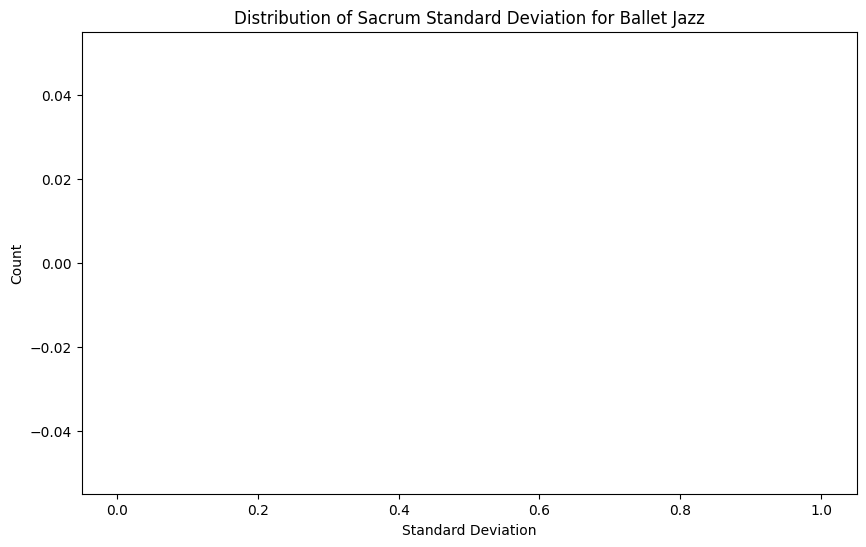

In [36]:
#plot the sacrumstd of all the Ballet Jazz pieces
plt.figure(figsize=(10, 6))
sns.distplot(dfBM[dfBM['Genre'] == 'BalletJazz']['sacrumstd'], bins=20, kde=False)
plt.title('Distribution of Sacrum Standard Deviation for Ballet Jazz')
plt.xlabel('Standard Deviation')
plt.ylabel('Count')
plt.show()


In [26]:
print(dfBM[dfBM['Genre'] == 'House'].describe())


       window size    sacrumstd  sacrumjerkmag  sacrumjerky  \
count  2480.000000  2480.000000    2480.000000  2480.000000   
mean    168.387097     5.034596     842.214755   -21.780197   
std      58.877315     1.714687     264.822596   116.333450   
min     120.000000     1.953004     311.764142  -327.949775   
25%     120.000000     3.754334     660.018315   -97.633322   
50%     120.000000     4.726360     778.621896   -20.999031   
75%     240.000000     6.034277     967.324454    55.633720   
max     240.000000    14.502904    1908.818985   414.156947   

       angularmomentumxz  angularmomentumy  angularmomentumxzstd  \
count        2480.000000       2480.000000           2480.000000   
mean           96.320732        152.157555           2979.387027   
std          1852.776506        351.643815           1128.148640   
min         -3997.532270      -1192.942572            718.866151   
25%         -1324.983461        -49.327998           2081.748367   
50%          -214.453238

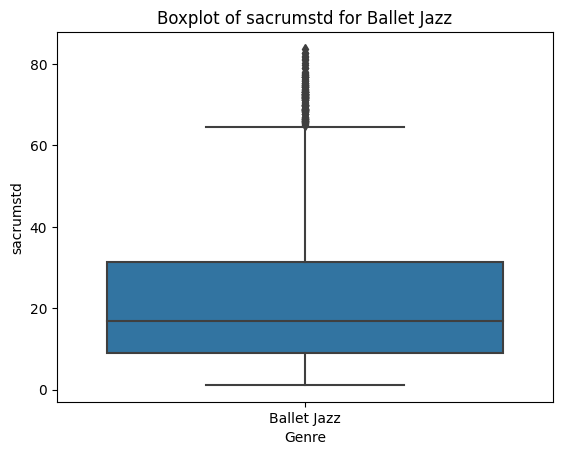

In [27]:
sns.boxplot(data=dfBM[dfBM['Genre'] == 'Ballet Jazz'], x='Genre', y='sacrumstd')
plt.title('Boxplot of sacrumstd for Ballet Jazz')
plt.show()


In [28]:
# Filter the DataFrame to only include records from the Ballet Jazz genre
ballet_jazz_data = dfBM[dfBM['Genre'] == 'Ballet Jazz']

# Calculate the IQR for the 'sacrumstd' feature
Q1 = ballet_jazz_data['sacrumstd'].quantile(0.25)
Q3 = ballet_jazz_data['sacrumstd'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = ballet_jazz_data[(ballet_jazz_data['sacrumstd'] < lower_bound) | (ballet_jazz_data['sacrumstd'] > upper_bound)]

# Display the outliers
print("Potential outliers:")
print(outliers)


Potential outliers:
       window size                          id        Genre  sacrumstd  \
28404          240  gJB_sBM_cAll_d08_mJB1_ch07  Ballet Jazz  76.932714   
28405          240  gJB_sBM_cAll_d08_mJB1_ch07  Ballet Jazz  74.400094   
28406          240  gJB_sBM_cAll_d08_mJB1_ch07  Ballet Jazz  72.492969   
28407          240  gJB_sBM_cAll_d08_mJB1_ch07  Ballet Jazz  75.863811   
28408          240  gJB_sBM_cAll_d08_mJB1_ch07  Ballet Jazz  76.385945   
...            ...                         ...          ...        ...   
31545          240  gJB_sBM_cAll_d09_mJB3_ch06  Ballet Jazz  71.734424   
31546          240  gJB_sBM_cAll_d09_mJB3_ch06  Ballet Jazz  77.036447   
31547          240  gJB_sBM_cAll_d09_mJB3_ch06  Ballet Jazz  76.106151   
31564          240  gJB_sBM_cAll_d09_mJB2_ch06  Ballet Jazz  71.715110   
31565          240  gJB_sBM_cAll_d09_mJB2_ch06  Ballet Jazz  69.664257   

       sacrumjerkmag  sacrumjerky  angularmomentumxz  angularmomentumy  \
28404    1973.541